
🧪 **Case Study: Coffee Shop Customer Spending**

### 🏢 Business Background:

A popular coffee shop chain is analyzing **customer spending behavior** across different regions and genders to optimize marketing strategies and offers. They have data for 100 customers with the following columns:

* `CustomerID`
* `Gender` (Male/Female)
* `Region` (Urban/Suburban/Rural)
* `Monthly_Spending` (in ₹)
* `Monthly_Visits` (number of visits per month)
* `LoyaltyMember` (Yes/No)

---

**🎯 Business Questions (Convert to Hypothesis Testing)**

| Question                                                                 | Test Type         |
| ------------------------------------------------------------------------ | ----------------- |
| 1. Do male and female customers spend differently per month?             | Two-sample t-test |
| 2. Do loyalty program members spend significantly more than non-members? | Two-sample t-test |
| 3. Is there any difference in spending behavior across regions?          | One-way ANOVA     |
| 4. Is Gender independent of Loyalty Membership?                          | Chi-square test   |

---

**✍️ Your Deliverables (Today’s Practice Result)**

| Deliverable      | Description                                                |
| ---------------- | ---------------------------------------------------------- |
| ✅ Notebook       | `coffee_shop_hypothesis_testing.ipynb`                     |
| ✅ Markdown       | State hypotheses for each test                             |
| ✅ Interpretation | Conclusion for each question based on p-value              |
| ✅ Bonus          | Add 1 insight chart using Seaborn (barplot, boxplot, etc.) |
| ✅ (Optional)     | Push to GitHub with README about what you analyzed         |

> **Project: Hypothesis Testing - Coffee Shop Analysis**
> Performed statistical tests on a synthetic customer dataset from a coffee shop to derive business insights. Applied t-tests, ANOVA, and Chi-square to understand gender-based spending patterns, impact of loyalty membership, and regional differences. Interpreted p-values to make data-driven recommendations.

In [1]:
import pandas as pd
import numpy as np
import math as math

np.random.seed(42)

n = 100
data = pd.DataFrame({
    'CustomerID': range(1, n+1),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Region': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n),
    'Monthly_Spending': np.random.normal(loc=1200, scale=200, size=n).round(2),
    'Monthly_Visits': np.random.randint(3, 15, size=n),
    'LoyaltyMember': np.random.choice(['Yes', 'No'], size=n, p=[0.6, 0.4])
})

data.head()

,CustomerID,Gender,Region,Monthly_Spending,Monthly_Visits,LoyaltyMember
0,1,Male,Rural,903.52,3,No
1,2,Female,Suburban,1154.23,7,No
2,3,Male,Suburban,1392.53,14,No
3,4,Male,Suburban,1158.06,5,Yes
4,5,Male,Suburban,1045.19,6,Yes


In [2]:
male_df = data[data["Gender"] == "Male"]

In [3]:
print(len(male_df))
male_df.head()

44


,CustomerID,Gender,Region,Monthly_Spending,Monthly_Visits,LoyaltyMember
0,1,Male,Rural,903.52,3,No
2,3,Male,Suburban,1392.53,14,No
3,4,Male,Suburban,1158.06,5,Yes
4,5,Male,Suburban,1045.19,6,Yes
6,7,Male,Suburban,1344.82,3,Yes


In [4]:
female_df = data[data["Gender"] == "Female"]

In [5]:
print(len(female_df))
female_df.head()

56


,CustomerID,Gender,Region,Monthly_Spending,Monthly_Visits,LoyaltyMember
1,2,Female,Suburban,1154.23,7,No
5,6,Female,Suburban,1128.04,5,No
9,10,Female,Suburban,937.74,14,Yes
14,15,Female,Urban,980.75,11,Yes
16,17,Female,Rural,1066.79,10,Yes


<font size = 12 color = "red">Objective</font>

Do male and female customers spend differently per month?

<font size = 12 color = "red">Setting Hypothesis</font>

Null Hypothesis : $\text{Monthly Spending}_\text{male} = \text{Monthly Spending}_\text{female}$<br>
Alternative Hypothesis : $\text{Monthly Spending}_\text{male} \neq \text{Monthly Spending}_\text{female}$

<font size = 12 color = "red">Choosing Hypothesis</font>

We Don't have Population Standard Devation So we will choose T_test . Also in Alternative Hypothesis we have $\neq$ so it is two tailed Hypothesis , so Finally We will Chhose Two  Tailed 
t_test

We have to Perform Hypothesis on Two independent  Set of Sample (Male,Female) So it is Two Sample T-Test

In [6]:
# Significance Level = 5%
alpha = 0.05

In [7]:
# Sample Size
n_male = len(male_df)
n_female = len(female_df)

#Degree of Freedom
df = n_male + n_female - 2

#Mean of Sample
mu_male = male_df["Monthly_Spending"].mean()
mu_female = female_df["Monthly_Spending"].mean()

#Sample Standard Devation
std_male = male_df["Monthly_Spending"].std()
std_female = female_df["Monthly_Spending"].std()

#pooled Standard Devation
num = (n_male - 1)*((std_male)**2) + (n_female - 1)*((std_female)**2)
den = n_male + n_female - 2

std_p = math.sqrt(num/den)

#Finding T_score
t_score= (mu_male - mu_female)/ math.sqrt((std_p**2)*(1/n_male + 1/n_female))
t_score 

0.602120151703943

Finding critical value using alpha(Significance Level) and df(Degree of Freedom)

$T_{\alpha/2 , df}$


In [8]:
from scipy.stats import t
critical_t_value = t.ppf(1-alpha/2,df)
p_value = 2 * (1 - t.cdf(abs(t_score), df))

print(f"Critical T_Value = {critical_t_value} , P_value = {p_value}")


Critical T_Value = 1.984467454426692 , P_value = 0.5484847525532055


### Doing Everything Uisng Pre Builtin Function / Module

In [9]:
from scipy.stats import ttest_ind

t_value ,p_score = ttest_ind(male_df["Monthly_Spending"],female_df["Monthly_Spending"])
t_value , p_score

(0.602120151703943, 0.5484847525532055)


P_Score > 0.05 So,

Fail to reject the null hypothesis. > ➡️ There’s no strong evidence to suggest that male and female monthly spending differs significantly.

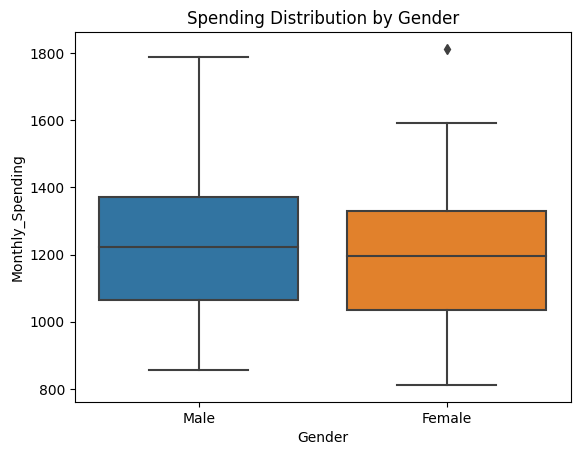

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Gender", y="Monthly_Spending", data=data)
plt.title("Spending Distribution by Gender")
plt.show()

In [11]:
mu_male , mu_female

(1219.2845454545454, 1194.3714285714286)


### **Hypothesis Testing 2: Do Loyalty Program Members Spend More?**

To evaluate whether loyalty program members spend significantly more than non-members, we’re working with **two independent samples**—one from loyalty members and one from non-members.

Since the population standard deviations are unknown and sample sizes are moderate, we’ll use a **two-sample *t*-test**.

- **Test type:** One-tailed (we are specifically testing whether members spend *more*, not just differently).
- **Test selection:** Independent 2-sample *t*-test.
- **Assumptions:** The samples are independent, drawn from normally distributed populations with equal or similar variances.


### Setting Hypothesis

Null Hypothesis : $\mu_{loyalty Spend} = \mu_{NotLoyal spend}$

Alternative Hypothesis : $\mu_{loyalty Spend} > \mu_{NotLoyal spend}$

In [12]:
data.head()

Loyal_df = data[data["LoyaltyMember"] == "Yes"]

NotLoyal_df = data[data["LoyaltyMember"]== "No"]


In [13]:
#sample size
n_loyal = len(Loyal_df)
n_notloyal = len(NotLoyal_df)

#Degree of Freedom
df = n_loyal + n_notloyal -2

#mean of sample
mu_loyal = Loyal_df["Monthly_Spending"].mean()
mu_notloyal = NotLoyal_df["Monthly_Spending"].mean()

#Standard Devation of Sample
std_loyal = Loyal_df["Monthly_Spending"].std()
std_notloyal = NotLoyal_df["Monthly_Spending"].std()

#Pooled Standard Devation
sp = math.sqrt(((n_loyal - 1)*(std_loyal)**2 + (n_notloyal - 1)*(std_notloyal)**2)/df)

t_value = (mu_loyal - mu_notloyal)/math.sqrt((sp**2)*(1/n_loyal + 1/n_notloyal))
t_value

2.105161964456957

In [14]:
#Calculating p-value
p_value = 1-t.cdf(t_value,df)

In [15]:
from scipy.stats import ttest_ind

t_value,p_value = ttest_ind(Loyal_df["Monthly_Spending"],NotLoyal_df["Monthly_Spending"],
                            alternative = "greater")
t_value,p_value

(2.1051619644569572, 0.018917234299996775)

**${P-value} = 0.018$ <br> $\alpha = 0.05$**
${P-Value} < \alpha$

So We can reject Null Hypotheis so From above Hypothesis Proof that Loyalty Program Members Spend More

<font color="red" size="6">**Hypothesis Testing: Is there a difference in spending behavior across regions?**</font>

### 🎯 Objective  
To determine whether spending behavior is the same across **Rural**, **Suburban**, and **Urban** regions.

---

### 📜 Setting the Hypotheses  

- **Null Hypothesis ($H_0$)**:  
  $$\mu_{\text{Rural}} = \mu_{\text{Suburban}} = \mu_{\text{Urban}}$$  
  _All group means are equal; there is no difference in spending behavior across regions._

- **Alternative Hypothesis ($H_A$)**:  
  $$\text{Not all } \mu_i \text{ are equal}$$  
  _At least one region differs in average spending behavior._

---

### 🧪 Choosing the Test  

Since we are comparing means across **three independent groups**, we use a **One-Way ANOVA**.

---

In [16]:
rural = data[data["Region"] == "Rural"]
suburban = data[data["Region"] == "Suburban"]
urban = data[data["Region"] == "Urban"]

In [17]:
mu_len = list()
for i in data["Region"].unique():
    mu_len.append([data[data["Region"] == i]["Monthly_Spending"].mean() ,
               len(data[data["Region"] == i])])
mu_grand  = data["Monthly_Spending"].mean()


In [18]:
#Between Group Sum Of Square
ssb =   0
for i,j in mu_len:
    ssb = ssb + (j*(i - mu_grand)**2)
ssb

18621.84161526701

In [19]:
# Within Group sum of Square
ssw =0 
for i in [rural["Monthly_Spending"],suburban["Monthly_Spending"],urban["Monthly_Spending"]]:
    mu = i.mean()
    ssw = ssw + np.sum((i - mu)**2)
ssw

4130539.120360733

In [20]:
# Between Group Sum of Square
sst = np.sum((data["Monthly_Spending"] - data["Monthly_Spending"].mean())**2)
sst


4149160.9619759996

In [21]:
from scipy.stats import f
#Degree of Freedom for SSW 
dfb = 2
#Degree of Freedom For SST
dfw = len(data["Monthly_Spending"]) - 3

msb = ssb/dfb
msw = ssw/dfw

#F_value
f_value = msb/msw

#P_value
p_value = f.sf(f_value,dfb,dfw)
print(f"f_value = {f_value}     p_value = {p_value}")

f_value = 0.21865410108053263     p_value = 0.8039946252507988


In [22]:
p_value = f.sf(f_stat, df_between, df_within)

NameError: name 'f_stat' is not defined

In [ ]:
from scipy.stats import f_oneway
f_oneway(rural["Monthly_Spending"],suburban["Monthly_Spending"],urban["Monthly_Spending"])

F_onewayResult(statistic=0.21865410108053693, pvalue=0.8039946252507945)

$pvalue=0.8039946252507945$

$\alpha = 0.05$


So , $pvalue > \alpha$  Hence we cannot Reject Null Hypothesis  $\mu_{\text{Rural}} = \mu_{\text{Suburban}} = \mu_{\text{Urban}}$


<font color="red" size="6">**Hypothesis Testing 3: Is Gender Independent of Loyalty Membership?**</font>

### 🎯 Objective  
To determine whether **Gender** has a significant association with **Loyalty Membership** — that is, whether gender influences loyalty membership status.

---

### 📜 Setting the Hypotheses  

- **Null Hypothesis ($H_0$):**  
  Gender and Loyalty Membership are **independent** — there is **no association** between the two categorical variables.

- **Alternative Hypothesis ($H_A$):**  
  Gender and Loyalty Membership are **not independent** — there **is an association** between them.

---

### 🧪 Choosing the Test  
Since we are examining the relationship between **two categorical variables**, we use the **Chi-Square Test of Independence**.

---



In [ ]:
df_observed = pd.crosstab(data["Gender"],data["LoyaltyMember"],margins=True,margins_name="Total")
df_observed

LoyaltyMember,No,Yes,Total
Gender,,,
Female,26,30,56
Male,17,27,44
Total,43,57,100


In [ ]:
grand_total = df_observed.loc["Total","Total"]

df_estimate = pd.DataFrame(index= ["Female","Male"],columns = ["No","Yes"], dtype = float)

for row in df_estimate.index: 
    for col in df_estimate.columns:
        df_estimate.loc[row,col] = ((df_observed.loc[row,"Total"] * df_observed.loc["Total",col])/ grand_total)

df_estimate

,No,Yes
Female,24.08,31.92
Male,18.92,25.08


In [ ]:
observed_value = df_observed.loc[["Female","Male"],["No","Yes"]]
observed_value

LoyaltyMember,No,Yes
Gender,,
Female,26,30
Male,17,27


In [ ]:
from scipy.stats import chi2
residuals = np.sum(((observed_value - df_estimate)**2)/df_estimate)
stats = residuals.sum()

df = (2-1) * (2-1)
p_value = chi2.sf(stats,df)

stats,p_value

(0.6104055063663397, 0.43463517068036106)

In [ ]:
from scipy.stats import chi2_contingency,chi2

stats , p_value ,dof ,expected = chi2_contingency(df_observed)

In [ ]:
stats ,p_value

(0.6104055063663397, 0.43463517068036106)

$pvalue=0.43463517068036106$

$\alpha = 0.05$


$pvalue > \alpha$  Hence we cannot Reject Null Hypothesis  

So, 

Both column `Gender` and `Loyalty Member` independent of each Other